<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/Model_Application_on_S_pombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/Dinesh-Adhithya-H/Bioinformatics/blob/master/chr1.fa?raw=true
!wget https://github.com/Dinesh-Adhithya-H/Bioinformatics/blob/master/chr2.fa?raw=true
!wget https://github.com/Dinesh-Adhithya-H/Bioinformatics/blob/master/chr3.fa?raw=true
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/oric-comma%20delimited.txt

--2021-03-19 19:28:01--  https://github.com/Dinesh-Adhithya-H/Bioinformatics/blob/master/chr1.fa?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Bioinformatics/raw/master/chr1.fa [following]
--2021-03-19 19:28:01--  https://github.com/Dinesh-Adhithya-H/Bioinformatics/raw/master/chr1.fa
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/chr1.fa [following]
--2021-03-19 19:28:01--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/chr1.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import seaborn as sns

In [5]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/oric-comma%20delimited.txt
oric_location=pd.read_csv("/content/oric-comma delimited.txt",delimiter=",")

--2021-03-19 19:28:16--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/oric-comma%20delimited.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29874 (29K) [text/plain]
Saving to: ‘oric-comma delimited.txt.2’

oric-comma delimite 100%[===================>]  29.17K  --.-KB/s    in 0.002s  

2021-03-19 19:28:16 (12.5 MB/s) - ‘oric-comma delimited.txt.2’ saved [29874/29874]



In [9]:
c1=open("/content/chr1.fa?raw=true","r+")
c1=c1.readlines()

In [10]:
len(c1)

92987

In [11]:
len(c1[0])

28

In [12]:
27*92987

2510649

In [13]:
seq1=""
for i in c1[1:]:
  seq1+=i.strip("\n")

In [14]:
len(seq1),c1[0]

(5579133, '>chromosome1 length=5579133\n')

In [15]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-03-19 19:29:16--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9133 (8.9K) [text/plain]
Saving to: ‘90_sdandard.txt’

90_sdandard.txt     100%[===================>]   8.92K  --.-KB/s    in 0s      

2021-03-19 19:29:16 (87.1 MB/s) - ‘90_sdandard.txt’ saved [9133/9133]



In [16]:
oric_location.drop(["name","othernames"],inplace=True,axis=1)

In [17]:
oric_location["length"]=np.array(oric_location["end"]-oric_location["start"])

In [18]:
oric_location

,chr,start,end,status,length
0,1,10578,11078,Dubious,500
1,1,14876,15876,Dubious,1000
2,1,20109,20609,Dubious,500
3,1,43650,44150,Dubious,500
4,1,50226,51226,Dubious,1000
...,...,...,...,...,...
736,3,2406300,2423300,Dubious,17000
737,3,2426143,2426643,Likely,500
738,3,2428573,2429073,Likely,500
739,3,2430490,2437490,Dubious,7000


In [19]:
oric_seq1=oric_location.loc[(oric_location['chr'] == 1) & (oric_location['length'] ==500)]

In [20]:
oric_seq1

,chr,start,end,status,length
0,1,10578,11078,Dubious,500
2,1,20109,20609,Dubious,500
3,1,43650,44150,Dubious,500
6,1,61633,62133,Likely,500
7,1,69625,70125,Likely,500
...,...,...,...,...,...
321,1,5554634,5555134,Likely,500
322,1,5558630,5559130,Likely,500
323,1,5568279,5568779,Likely,500
324,1,5570709,5571209,Likely,500


In [21]:
oric_location.iloc[0]["start"]-oric_location.iloc[0]["end"]

-500

In [22]:
parameters=open("/content/90_sdandard.txt")
data_parameters=pd.read_csv(parameters,delimiter="\t")

In [23]:
data_parameters.head()

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99


In [24]:
data_parameters

,Physicochemical properties,GG,GA,GC,GT,AG,AA,AC,AT,CG,CA,CC,CT,TG,TA,TC,TT
0,Base stacking,-0.07,-0.65,-2.46,-0.92,0.49,1.02,-0.92,0.57,-0.58,0.57,-0.07,0.49,0.57,1.60,-0.65,1.02
1,Protein induced deformability,0.36,-0.14,-0.30,-0.83,-0.89,-0.64,-0.83,-1.05,2.23,1.51,0.36,-0.89,1.51,0.42,-0.14,-0.64
2,B-DNA twist,-0.06,1.11,0.79,-0.65,-1.33,0.00,-0.65,2.09,-1.14,0.60,-0.06,-1.33,0.60,-1.06,1.11,0.00
3,Dinucleotide GC Content,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37,1.37,0.00,1.37,0.00,0.00,-1.37,0.00,-1.37
4,A-philicity,-1.19,1.02,0.32,-1.36,-0.80,0.99,-1.36,-0.10,-0.27,1.19,-1.19,-0.80,1.19,0.32,1.02,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Wedge,-0.87,0.34,0.23,-1.25,1.52,1.06,-1.25,-0.68,0.87,-0.34,-0.87,1.52,-0.34,-1.33,0.34,1.06
86,Direction,0.44,1.05,1.62,-1.48,-0.09,-1.59,1.27,-0.11,-0.11,-0.72,-0.66,-0.13,0.51,-0.11,-1.26,1.37
87,Flexibility_slide,-0.15,0.62,-0.95,0.43,-0.09,1.53,0.43,1.00,-1.04,-1.74,-0.15,-0.09,-1.74,-0.21,0.62,1.53
88,Flexibility_shift,-0.22,-0.25,-1.42,1.20,0.95,-0.28,1.20,-1.70,2.01,-0.53,-0.22,0.95,-0.53,-0.64,-0.25,-0.28


In [27]:
x=[]
features1=data_parameters['Physicochemical properties']
for i in oric_seq1.index:
  #print(oric_seq1.iloc[i])
  xx=[]
  s=seq1[oric_seq1.loc[i]["start"]:oric_seq1.loc[i]["end"]]
  xx.append(s[:299])
  xx.append(s[201::])
  x.append(xx)

In [28]:
x_data=[]
for i in x:
  seq_data1=[]
  seq_data2=[]
  for pos in range(0,298):
    seq_data1.append(np.array(data_parameters[i[0][pos:pos+2]]))
    seq_data2.append(np.array(data_parameters[i[1][pos:pos+2]]))
  seq_data1=np.array(seq_data1)
  seq_data2=np.array(seq_data2)
  x_data.append([seq_data1,seq_data2])

In [29]:
x_data[0][0].reshape(1,298,90,1)

array([[[[ 0.57],
         [-1.05],
         [ 2.09],
         ...,
         [ 1.  ],
         [-1.7 ],
         [ 0.9 ]],

        [[ 1.6 ],
         [ 0.42],
         [-1.06],
         ...,
         [-0.21],
         [-0.64],
         [ 0.4 ]],

        [[ 0.57],
         [-1.05],
         [ 2.09],
         ...,
         [ 1.  ],
         [-1.7 ],
         [ 0.9 ]],

        ...,

        [[ 1.02],
         [-0.64],
         [ 0.  ],
         ...,
         [ 1.53],
         [-0.28],
         [ 0.4 ]],

        [[ 1.02],
         [-0.64],
         [ 0.  ],
         ...,
         [ 1.53],
         [-0.28],
         [ 0.4 ]],

        [[ 1.02],
         [-0.64],
         [ 0.  ],
         ...,
         [ 1.53],
         [-0.28],
         [ 0.4 ]]]])

In [30]:
import tensorflow as tf
saved_model= tf.keras.models.load_model('/content/deeplearning_orIC (1).h5')

In [31]:
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 297, 89, 32)       160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 148, 44, 32)       0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 148, 44, 32)       128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 43, 64)       8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 21, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 73, 21, 64)        256       
_________________________________________________________________
flatten_3 (Flatten)          (None, 98112)            

In [32]:
saved_model.predict(x_data[152][0].reshape(1,298,90,1)),saved_model.predict(x_data[152][1].reshape(1,298,90,1))

(array([[7.561914e-08, 9.999999e-01]], dtype=float32),
 array([[1.4080695e-06, 9.9999857e-01]], dtype=float32))

In [33]:
for i in range(154):
  print(0.5*saved_model.predict(x_data[i][0].reshape(1,298,90,1))+0.5*saved_model.predict(x_data[i][1].reshape(1,298,90,1)),np.array(oric_seq1["status"])[i])

[[0.01208335 0.98791665]] Dubious
[[6.7949914e-06 9.9999321e-01]] Dubious
[[0.02620993 0.97379005]] Dubious
[[2.5460946e-05 9.9997449e-01]] Likely
[[2.6777770e-05 9.9997324e-01]] Likely
[[1.2755250e-04 9.9987245e-01]] Likely
[[7.9091924e-04 9.9920905e-01]] Likely
[[1.2643119e-04 9.9987352e-01]] Likely
[[5.5800465e-05 9.9994421e-01]] Likely
[[6.894986e-07 9.999993e-01]] Likely
[[0.00177073 0.99822927]] Likely
[[1.7753063e-04 9.9982250e-01]] Likely
[[5.0449358e-07 9.9999946e-01]] Likely
[[0.1343374  0.86566263]] Likely
[[3.1123936e-04 9.9968874e-01]] Dubious
[[7.367529e-06 9.999926e-01]] Likely
[[1.9088449e-04 9.9980909e-01]] Likely
[[8.005782e-06 9.999920e-01]] Likely
[[0.00238434 0.99761564]] Likely
[[1.1838059e-04 9.9988157e-01]] Likely
[[0.00159564 0.9984044 ]] Likely
[[8.798685e-05 9.999120e-01]] Likely
[[6.171680e-05 9.999383e-01]] Likely
[[1.2909986e-05 9.9998713e-01]] Likely
[[3.3767021e-06 9.9999660e-01]] Likely
[[0.00112476 0.99887526]] Likely
[[0.01265511 0.98734486]] Likely
[

In [61]:
l=[]
for j in range(0,10000):
  junk=[]
  for i in range(298):
    junk.append(np.array(data_parameters[seq1[j+i:j+i+2]]))
  junk=np.array(junk)
  l.append(junk)
l=np.array(l)

In [65]:
junk.shape

(1, 298, 90, 1)

In [63]:
l.shape

(10000, 298, 90)

In [64]:
junk=junk.reshape(1,298,90,1)

In [66]:
saved_model.predict(junk)

array([[9.9926084e-01, 7.3917100e-04]], dtype=float32)

In [67]:
for i in l:
  print(saved_model.predict(i.reshape(1,298,90,1)),"non oric")

Streaming output truncated to the last 5000 lines.
[[0.52677065 0.47322932]] non oric
[[0.34357715 0.6564229 ]] non oric
[[0.9051278  0.09487218]] non oric
[[0.64237803 0.3576219 ]] non oric
[[0.6242265  0.37577346]] non oric
[[0.57474315 0.42525685]] non oric
[[0.21512994 0.7848701 ]] non oric
[[0.52066505 0.47933495]] non oric
[[0.28619745 0.7138025 ]] non oric
[[0.7834028  0.21659727]] non oric
[[0.67637074 0.32362932]] non oric
[[0.38735646 0.61264354]] non oric
[[0.1551574 0.8448426]] non oric
[[0.18964368 0.81035626]] non oric
[[0.12075268 0.87924725]] non oric
[[0.43038425 0.5696157 ]] non oric
[[0.63155884 0.3684412 ]] non oric
[[0.73961306 0.26038694]] non oric
[[0.93525493 0.06474505]] non oric
[[0.98360425 0.01639576]] non oric
[[0.85205317 0.14794692]] non oric
[[0.5716057  0.42839432]] non oric
[[0.17453086 0.82546914]] non oric
[[0.27859035 0.7214097 ]] non oric
[[0.27902395 0.72097605]] non oric
[[0.982502   0.01749795]] non oric
[[0.8978766 0.1021234]] non oric
[[0.9978

In [68]:
len(seq1)

5579133

In [70]:
oric_location.loc[oric_location["chr"]==1]

,chr,start,end,status,length
0,1,10578,11078,Dubious,500
1,1,14876,15876,Dubious,1000
2,1,20109,20609,Dubious,500
3,1,43650,44150,Dubious,500
4,1,50226,51226,Dubious,1000
...,...,...,...,...,...
321,1,5554634,5555134,Likely,500
322,1,5558630,5559130,Likely,500
323,1,5568279,5568779,Likely,500
324,1,5570709,5571209,Likely,500


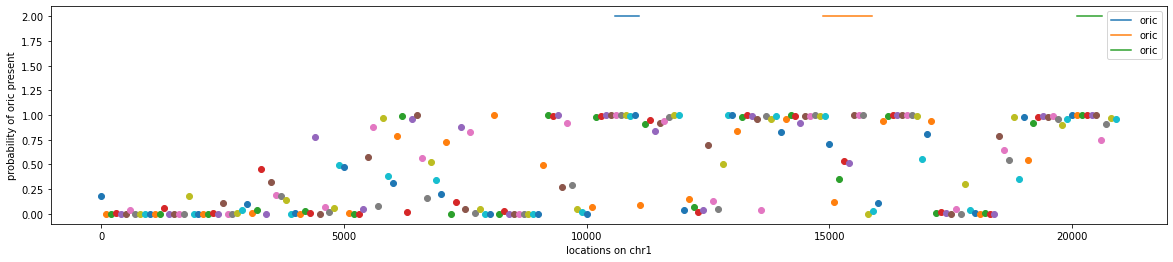

In [79]:
plt.figure(figsize=(20,4))
for i in range(0,21000,100):
  junk=[]
  for j in range(298):
    junk.append(np.array(data_parameters[seq1[i+j:i+j+2]]))
  junk=np.array(junk)
  model_prediction=saved_model.predict(junk.reshape(1,298,90,1))
  plt.scatter(i,model_prediction[0][1])
plt.plot([10578,11078],[2,2],label="oric")
plt.plot([14876,15876],[2,2],label="oric")
plt.plot([20109,20609	],[2,2],label="oric")
plt.xlabel("locations on chr1")
plt.ylabel("probability of oric present")
plt.legend()
plt.show()